# Sobre o Dataset

LINK: https://www.kaggle.com/wangyongkun/sugarbeetsandweeds

Na procura de imagens para treinar um modelo para detecção de ervas daninhas, o kaggle foi a melhor opção para encontrar um dataset com imagens já anotadas, a melhor opção para o teste inicial era pegar um dataset pronto. O escolhido possuia como cultura principal e única a beterraba, e ervas daninhas (as espécies não foram especificadas), porém todas as ervas daninhas estavam anotadas como weed (erva daninha em inglês), em resumo, é um dataset com duas classes: sugarbeet e weed.

# Download Dataset



In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raislervoigt","key":"c0a42858fac9ddb8e6cda991e3382642"}'}

In [ ]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d wangyongkun/sugarbeetsandweeds

 64% 41.0M/63.7M [00:00<00:00, 43.6MB/s]
100% 63.7M/63.7M [00:00<00:00, 87.0MB/s]


In [ ]:
!unzip /content/sugarbeetsandweeds.zip -d sugarbeetandweeds

Archive:  /content/sugarbeetsandweeds.zip
  inflating: sugarbeetandweeds/data/train/annotation/X-10-0.xml  
  inflating: sugarbeetandweeds/data/train/annotation/X-10-1.xml  
  inflating: sugarbeetandweeds/data/train/annotation/X-110-0.xml  
  inflating: sugarbeetandweeds/data/train/annotation/X-110-1.xml  
  inflating: sugarbeetandweeds/data/train/annotation/X-130-0.xml  
  inflating: sugarbeetandweeds/data/train/annotation/X-130-1.xml  
  inflating: sugarbeetandweeds/data/train/annotation/X-150-0.xml  
  inflating: sugarbeetandweeds/data/train/annotation/X-150-1.xml  
  inflating: sugarbeetandweeds/data/train/annotation/X-170-0.xml  
  inflating: sugarbeetandweeds/data/train/annotation/X-170-1.xml  
  inflating: sugarbeetandweeds/data/train/annotation/X-190-1.xml  
  inflating: sugarbeetandweeds/data/train/annotation/X-210-0.xml  
  inflating: sugarbeetandweeds/data/train/annotation/X-210-1.xml  
  inflating: sugarbeetandweeds/data/train/annotation/X-230-0.xml  
  inflating: sugarbeet

# Download Packages

In [ ]:
!pip install detecto

In [ ]:
# All imports

from detecto.core import (Model, Dataset, DataLoader)
import matplotlib.pyplot as plt
from detecto.utils import read_image
from detecto.visualize import plot_prediction_grid
import cv2
import os

# Sobre as bibliotecas

Detecto é um pacote Python que permite construir modelos de detecção de objetos com um minímo de 5 linhas de código, ele é construído em cima do PyTorch, porém com mais abstração das etapas para facilitar o desenvolvimento. Ele também possui ferramentas para inferência em imagens estáticas e vídeos, aprendizagem de transferência em conjuntos de dados personalizados e serialização de modelos para arquivos são apenas alguns dos recursos do Detecto. Para o treinamento do modelo ele utiliza uma arquitetura de deep learning convolucional, mais especificamente um modelo pré-treinado chamado Faster R-CNN ResNet-50-FPN.

OpenCV  é o pacote Python mais famoso quando se fala em visão computacional, é com ele que podemos fazer tratamento de imagens, aplicação de filtros, modificações, etc, os recursos são muitos, o site para mais informações: https://opencv.org/

Matplotlib é o pacote Python mais famoso quando se trata de visualização de dados em gráficos, mas ele serve para imagens, ele se faz necessário para alguns comandos em conjunto com o OpenCV



# Olhando o dataset

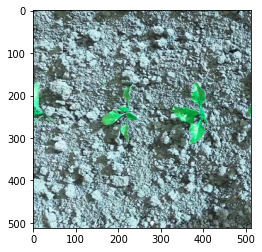

In [ ]:
img_example = cv2.imread('/content/sugarbeetandweeds/data/train/image/X-150-0.png')
plt.imshow(img_example)
plt.show()

## Train model

## Explicação do código abaixo

o Dataset possui duas divisões, a divisão que realmente é utilizada para fazer o algoritmo aprender, e outra que serve como validação,quando o modelo é colocado em teste com dados dos quais ele nunca viu.

Os parâmetros e seus valores escolhidos para o treinamento do modelo foram:
* 120 épocas, que significa que ele percorreu 120 vezes o dataset de treinamento para atualizar os parâmetros internos da rede.
* Learning Rate que traduzindo para o português signica taxa de aprendizado, é um número ou melhor dizendo, uma taxa, que diz o quanto um modelo irá mudar em resposta ao erro estimado toda vez os pesos do modelo forem atualizados.
* Para outros parâmetros, foi escolhido valores padrão da biblioteca, já que são parâmetros mais complexos, foi escolhido deixar os valores padrão, já que a biblioteca foi feita especialmente para detecção de objetos, então acredita-se que sejam os melhores valores, para mais informações, basta consultar a documentação da biblioteca (LEO, coloque a documentação como referência aqui, o link é esse: https://detecto.readthedocs.io/en/latest/api/core.html?highlight=fit#detecto.core.Model.fit


In [ ]:
dataset = Dataset('/content/sugarbeetandweeds/data/train/annotation','/content/sugarbeetandweeds/data/train/image')
val = Dataset('/content/sugarbeetandweeds/data/val/annotation', '/content/sugarbeetandweeds/data/val/image')
loader = DataLoader(dataset=dataset, batch_size = 2)
your_labels = ['sugarbeet', 'weed']
model1 = Model(your_labels)

In [ ]:
losses = model1.fit(loader, val, epochs=120, learning_rate=0.001, verbose=True)

  0%|          | 0/58 [00:00<?, ?it/s]

Epoch 1 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.29614919424057
Epoch 2 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.1337165385484695
Epoch 3 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 0.9945122823119164
Epoch 4 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.03141900151968
Epoch 5 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0331645458936691
Epoch 6 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.024161510169506
Epoch 7 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0062860026955605
Epoch 8 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0067795738577843
Epoch 9 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.017509587109089
Epoch 10 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.038900688290596
Epoch 11 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0020205676555634
Epoch 12 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0070050433278084
Epoch 13 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.018447920680046
Epoch 14 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0284637734293938
Epoch 15 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.011842019855976
Epoch 16 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0034126415848732
Epoch 17 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0594286024570465
Epoch 18 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0061370879411697
Epoch 19 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0187632143497467
Epoch 20 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0296972841024399
Epoch 21 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0143079161643982
Epoch 22 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0159082934260368
Epoch 23 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0424783378839493
Epoch 24 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0184223875403404
Epoch 25 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0296928733587265
Epoch 26 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0205457657575607
Epoch 27 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0305776000022888
Epoch 28 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0260244980454445
Epoch 29 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0388156101107597
Epoch 30 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.020525336265564
Epoch 31 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.021393097937107
Epoch 32 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0174281299114227
Epoch 33 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.019529528915882
Epoch 34 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0162291899323463
Epoch 35 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.008710615336895
Epoch 36 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.023502454161644
Epoch 37 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0448268502950668
Epoch 38 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0257474333047867
Epoch 39 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0434087365865707
Epoch 40 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0101119130849838
Epoch 41 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.020008645951748
Epoch 42 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0178034007549286
Epoch 43 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0004568696022034
Epoch 44 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0324506908655167
Epoch 45 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0402141138911247
Epoch 46 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.026191733777523
Epoch 47 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0318981185555458
Epoch 48 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 0.997282363474369
Epoch 49 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0238312631845474
Epoch 50 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0123808830976486
Epoch 51 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.034751072525978
Epoch 52 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0338548421859741
Epoch 53 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.022319532930851
Epoch 54 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0113475397229195
Epoch 55 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 0.9965111836791039
Epoch 56 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0215172991156578
Epoch 57 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0418569073081017
Epoch 58 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0079684555530548
Epoch 59 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.020661137998104
Epoch 60 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.015891209244728
Epoch 61 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0252269431948662
Epoch 62 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0422625169157982
Epoch 63 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0343550220131874
Epoch 64 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.033318616449833
Epoch 65 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 0.9883171990513802
Epoch 66 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0031396448612213
Epoch 67 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.000623069703579
Epoch 68 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0213663652539253
Epoch 69 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0309063345193863
Epoch 70 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0267365798354149
Epoch 71 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0118767246603966
Epoch 72 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0153542831540108
Epoch 73 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0325646474957466
Epoch 74 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.000276543200016
Epoch 75 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0315394178032875
Epoch 76 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0080347210168839
Epoch 77 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.030563972890377
Epoch 78 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0253364592790604
Epoch 79 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0362115427851677
Epoch 80 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0184404775500298
Epoch 81 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0115012526512146
Epoch 82 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.049889013171196
Epoch 83 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0083803460001945
Epoch 84 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0276196748018265
Epoch 85 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.010045975446701
Epoch 86 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0254898741841316
Epoch 87 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0139950588345528
Epoch 88 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0226953402161598
Epoch 89 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.013154298067093
Epoch 90 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.035664901137352
Epoch 91 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0176851376891136
Epoch 92 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.017690509557724
Epoch 93 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0133025273680687
Epoch 94 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.009112574160099
Epoch 95 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0413839146494865
Epoch 96 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0220941975712776
Epoch 97 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0311708599328995
Epoch 98 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0296247825026512
Epoch 99 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.031422346830368
Epoch 100 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0256119892001152
Epoch 101 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0043153017759323
Epoch 102 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0533064007759094
Epoch 103 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0127380937337875
Epoch 104 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0181018188595772
Epoch 105 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0308834686875343
Epoch 106 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0314675942063332
Epoch 107 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0183918327093124
Epoch 108 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.003160022199154
Epoch 109 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0498691722750664
Epoch 110 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0164664760231972
Epoch 111 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0307465344667435
Epoch 112 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0033855810761452
Epoch 113 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0102030485868454
Epoch 114 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0267080962657928
Epoch 115 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0120392516255379
Epoch 116 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0251138806343079
Epoch 117 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.0398116186261177
Epoch 118 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.023609608411789
Epoch 119 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/58 [00:00<?, ?it/s]

Loss: 1.022546648979187
Epoch 120 of 120
Begin iterating over training dataset


  0%|          | 0/4 [00:00<?, ?it/s]

Begin iterating over validation dataset


100%|██████████| 4/4 [00:00<00:00,  5.21it/s]

Loss: 1.008903294801712


## Evaluation

O Gráfico abaixo mostra como o treinamento se comportou em relação a "Loss", que é um termo que se refere ao erro médio do algoritmo, ao quanto ele está errando para as predições que ele faz. A função de perca serve como um otimizador, dependendo do que o cientista, observador ou seja quem for que está construindo a rede neural necessita, ele precisa saber se a taxa de perca que ele está tendo é boa ou não. Para avaliação do modelo, este foi a única métrica utilizada para avaliar a performance do modelo.

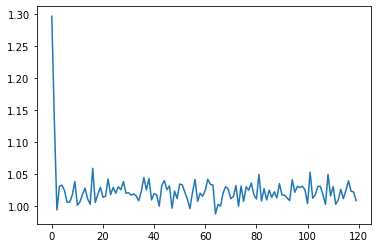

In [ ]:
plt.plot(losses)
plt.show()

# Olhando as predições

Leo, aqui vc fala o q vc quiser, coloca as imagens que quiser e finalize como quiser.

In [ ]:
image1 = read_image('/content/sugarbeetandweeds/data/val/image/X3-130-1.png')
image2 = read_image('/content/sugarbeetandweeds/data/val/image/X-270-1.png')
image3 = read_image('/content/sugarbeetandweeds/data/val/image/X2-30-1.png')

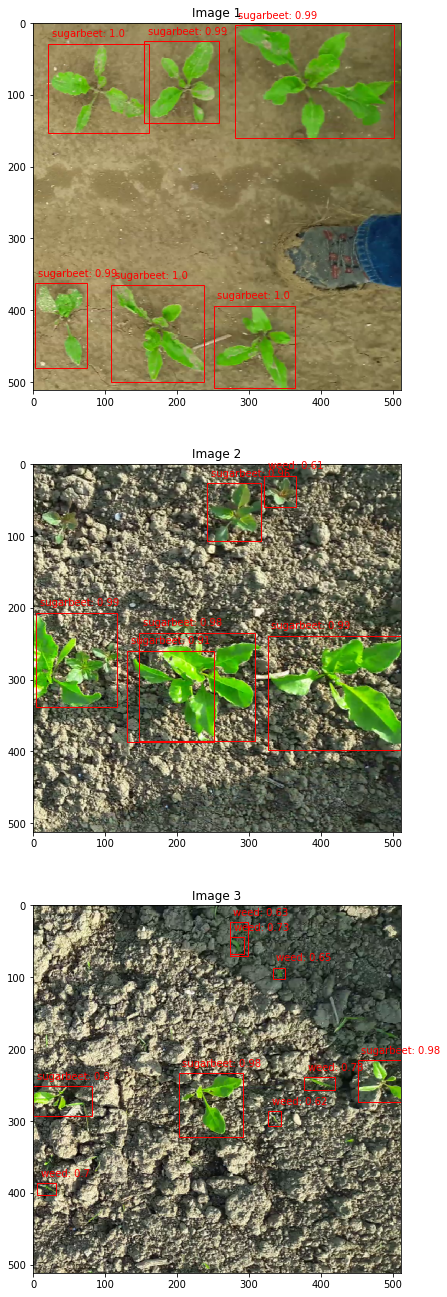

In [ ]:
images = [image1, image2, image3]
plot_prediction_grid(model1, images, figsize=(10, 23))

In [ ]:
model1.save('model1.pth')